# Neural Networks

In [1]:
!pip install torch==2.7.1 tqdm==4.66.4 scikit-learn==1.4.2 pandas numpy

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 6.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 7.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.17.2 requires torch==2.2.2, but you have torch 2.7.1 which is incompatible.

[notice] A new release of p

## Classification with NNs

In [2]:
!gdown 1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_

Downloading...
From: https://drive.google.com/uc?id=1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/heart.csv
100%|██████████████████████████████████████| 11.3k/11.3k [00:00<00:00, 37.9MB/s]


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('Datasets/heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


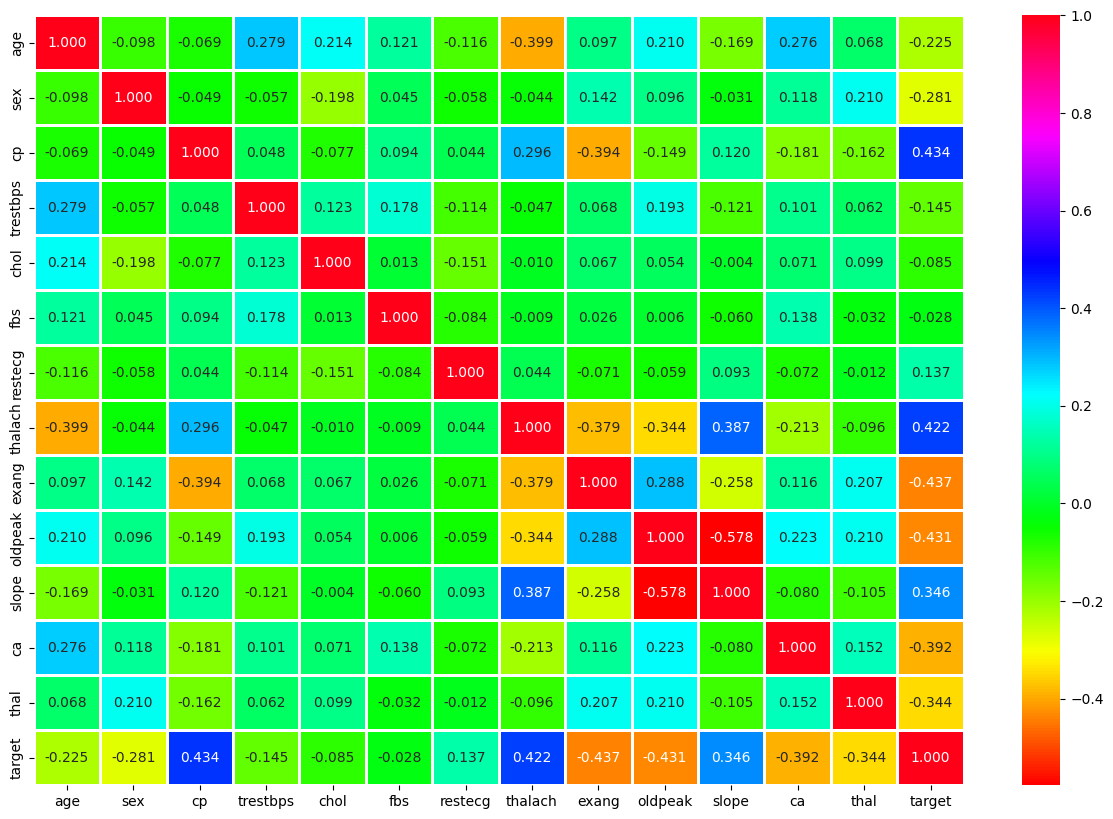

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['target'], axis = 1)
Y = data.target.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
Y_train_t = torch.tensor(Y_train.reshape(-1, 1), dtype=torch.float32)

# Create DataLoader for mini-batch training
train_ds = TensorDataset(X_train_t, Y_train_t)
train_loader = DataLoader(train_ds, batch_size=10, shuffle=True)

# Define the neural network (13 → 32 → 16 → 16 → 1 with sigmoid)
class HeartNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(13, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = HeartNet()

criterion = nn.BCELoss()          # binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
print(model)

HeartNet(
  (net): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [23]:
num_epochs = 150

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, loss = {epoch_loss:.4f}")

Epoch 10/150, loss = 0.3321
Epoch 20/150, loss = 0.2823
Epoch 30/150, loss = 0.2385
Epoch 40/150, loss = 0.1840
Epoch 50/150, loss = 0.1274
Epoch 60/150, loss = 0.0720
Epoch 70/150, loss = 0.0296
Epoch 80/150, loss = 0.0147
Epoch 90/150, loss = 0.0077
Epoch 100/150, loss = 0.0046
Epoch 110/150, loss = 0.0031
Epoch 120/150, loss = 0.0020
Epoch 130/150, loss = 0.0012
Epoch 140/150, loss = 0.0008
Epoch 150/150, loss = 0.0006


In [25]:
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test, dtype=torch.float32)).numpy().flatten()

y_pred[0:10]

array([1.07319146e-07, 1.19026275e-02, 3.08122762e-05, 2.17459672e-09,
       1.44780561e-01, 2.32794235e-04, 3.16297216e-03, 1.56300860e-06,
       2.92476444e-18, 6.68955282e-15], dtype=float32)

In [26]:
y_pred = y_pred.round()
y_pred[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

accuracy of the model:  0.819672131147541


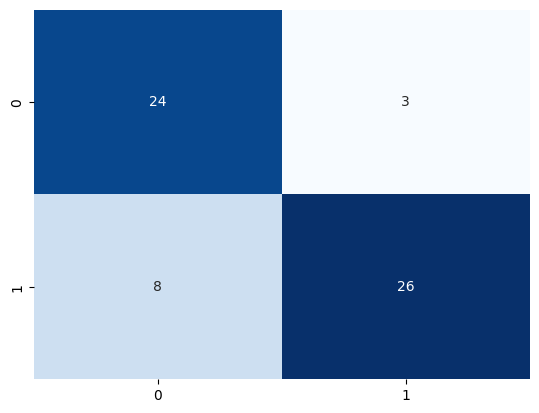

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ', ac)

## Regression with NNs

In [28]:
!gdown 11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H

Downloading...
From: https://drive.google.com/uc?id=11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Admission_Predict.csv
100%|██████████████████████████████████████| 12.9k/12.9k [00:00<00:00, 31.5MB/s]


In [29]:
data = pd.read_csv('Datasets/Admission_Predict.csv')

In [30]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


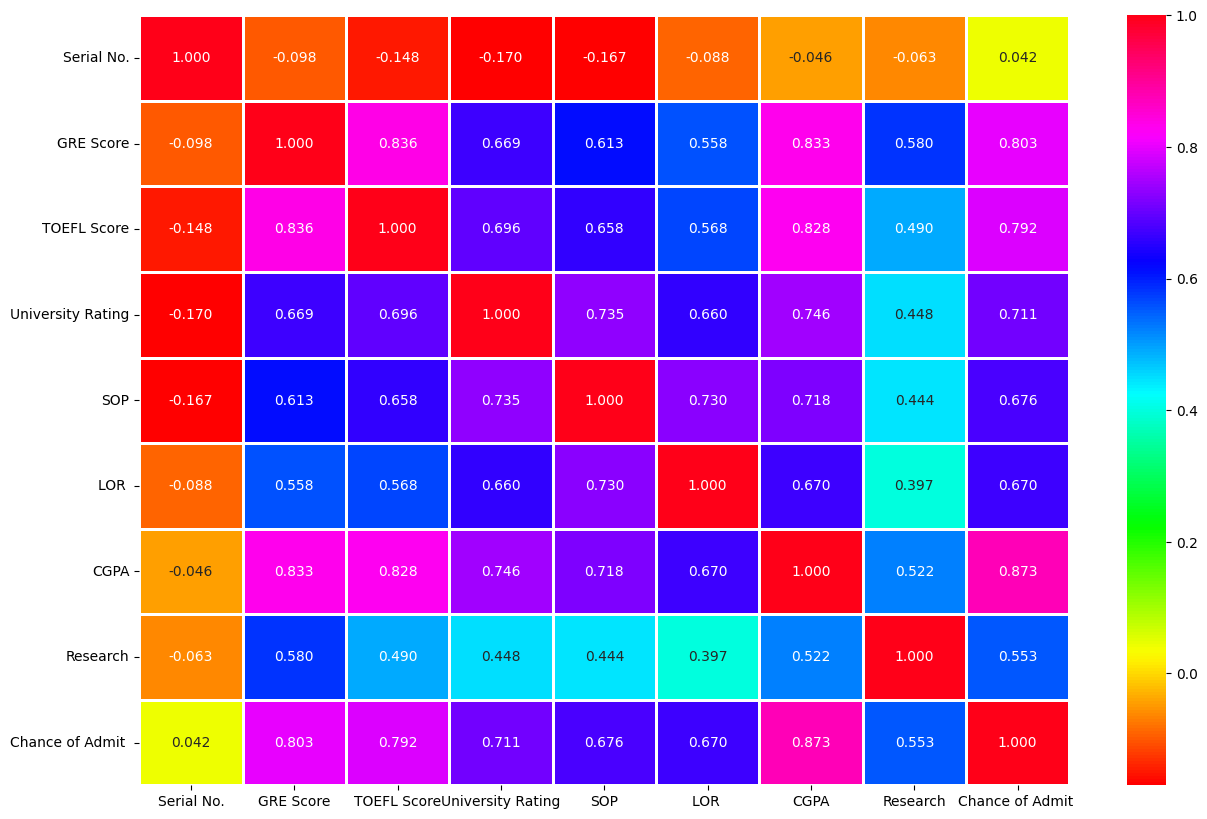

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='hsv', fmt='.3f', linewidths=2)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 1:-1], data.iloc[:, -1:], test_size = 0.2, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Convert numpy arrays / pandas objects to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
Y_train_t = torch.tensor(np.asarray(Y_train).reshape(-1, 1), dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
Y_test_t = torch.tensor(np.asarray(Y_test).reshape(-1, 1), dtype=torch.float32)

# Create train/validation split (similar to validation_split=0.2)
X_tr, X_val, Y_tr, Y_val = train_test_split(
    X_train_t, Y_train_t, test_size=0.2, random_state=0
)

train_ds = TensorDataset(X_tr, Y_tr)
val_ds = TensorDataset(X_val, Y_val)

train_loader = DataLoader(train_ds, batch_size=12, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=12, shuffle=False)

# Define regression network: 7 → 16 → 8 → 8 → 8 → 4 → 4 → 1
class AdmissionNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(7, 16),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),   # regression output
            nn.Sigmoid()       # keep output in [0, 1] similar to Keras sigmoid
        )

    def forward(self, x):
        return self.net(x)

model = AdmissionNet()

criterion = nn.MSELoss()                 # mean squared error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [52]:
print(model)

AdmissionNet(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=8, out_features=8, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=8, out_features=4, bias=True)
    (13): ReLU()
    (14): Linear(in_features=4, out_features=4, bias=True)
    (15): ReLU()
    (16): Linear(in_features=4, out_features=1, bias=True)
    (17): Sigmoid()
  )
)


In [53]:
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # ---- Train ----
    model.train()
    running_train = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_train += loss.item() * xb.size(0)

    epoch_train_loss = running_train / len(train_loader.dataset)

    # ---- Validate ----
    model.eval()
    running_val = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            outputs = model(xb)
            loss = criterion(outputs, yb)
            running_val += loss.item() * xb.size(0)

    epoch_val_loss = running_val / len(val_loader.dataset)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"train_loss={epoch_train_loss:.4f}, "
          f"val_loss={epoch_val_loss:.4f}")

Epoch 1/20, train_loss=0.0359, val_loss=0.0278
Epoch 2/20, train_loss=0.0323, val_loss=0.0241
Epoch 3/20, train_loss=0.0275, val_loss=0.0200
Epoch 4/20, train_loss=0.0227, val_loss=0.0151
Epoch 5/20, train_loss=0.0155, val_loss=0.0099
Epoch 6/20, train_loss=0.0114, val_loss=0.0084
Epoch 7/20, train_loss=0.0096, val_loss=0.0074
Epoch 8/20, train_loss=0.0090, val_loss=0.0068
Epoch 9/20, train_loss=0.0089, val_loss=0.0065
Epoch 10/20, train_loss=0.0079, val_loss=0.0064
Epoch 11/20, train_loss=0.0077, val_loss=0.0063
Epoch 12/20, train_loss=0.0074, val_loss=0.0062
Epoch 13/20, train_loss=0.0080, val_loss=0.0061
Epoch 14/20, train_loss=0.0075, val_loss=0.0062
Epoch 15/20, train_loss=0.0074, val_loss=0.0060
Epoch 16/20, train_loss=0.0066, val_loss=0.0058
Epoch 17/20, train_loss=0.0072, val_loss=0.0057
Epoch 18/20, train_loss=0.0063, val_loss=0.0056
Epoch 19/20, train_loss=0.0063, val_loss=0.0056
Epoch 20/20, train_loss=0.0062, val_loss=0.0056


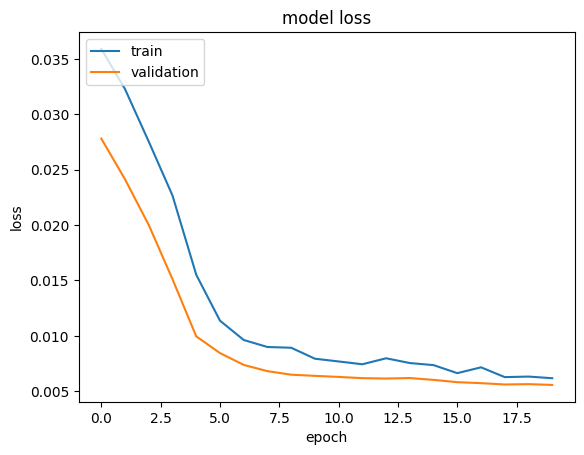

In [54]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).numpy().flatten()

y_pred[:10]

array([0.6877201 , 0.69605976, 0.7847767 , 0.61250037, 0.6891904 ,
       0.59971434, 0.68259656, 0.6121875 , 0.87202823, 0.91156125],
      dtype=float32)

In [56]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.6712977850266633
